<a href="https://colab.research.google.com/github/nehan0306/CodeClause_Market_Basket_Prediction/blob/main/CodeClause_Market_Basket_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Market Basket Prediction using Apriori Algorithm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset.csv


In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv(r'Groceries_dataset.csv')

In [5]:
data.sample(10)

,Member_number,Date,itemDescription
18597,4743,04-07-2015,domestic eggs
2694,4017,11-10-2015,sausage
18458,4354,16-01-2015,oil
33202,2258,05-03-2014,yogurt
29461,2127,19-11-2014,margarine
10741,4058,18-12-2014,specialty cheese
35663,3203,22-07-2014,flower (seeds)
29331,2934,22-03-2014,fruit/vegetable juice
29865,2892,19-08-2014,pastry
4655,4171,03-06-2015,yogurt


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df = data.groupby('itemDescription').size().reset_index(name = 'Frequency').sort_values('Frequency', ascending = False)

In [8]:
df.head(15)

,itemDescription,Frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


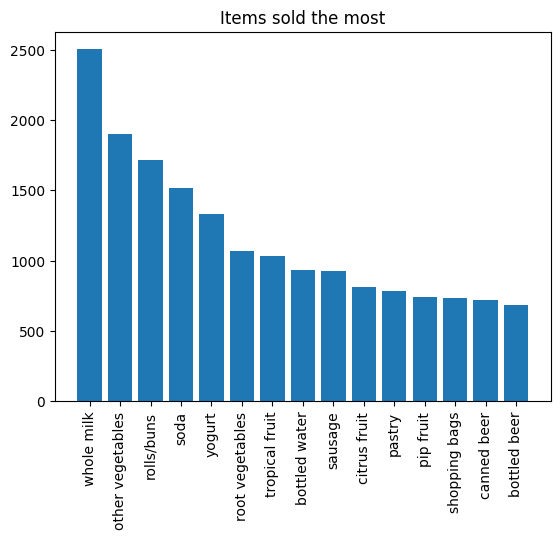

In [9]:
plt.bar(np.arange(len(df['itemDescription'].head(15))), df['Frequency'].head(15))
plt.title("Items sold the most")
plt.xticks(np.arange(len(df['itemDescription'].head(15))),df['itemDescription'].head(15),rotation = 90)
plt.show()

In [10]:
df1 = data[['Member_number', 'itemDescription']].sort_values('Member_number', ascending = False)

In [49]:
df1.head()

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables


In [ ]:
transaction = [a[1]['itemDescription'].tolist() for a in list(df1.groupby(['Member_number']))]

In [21]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=45c092470f8f617d2da98fb705e2fca32b7ef4aba34ba15d62e91991a07dd775
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [22]:
from apyori import apriori

In [60]:
algo_result = apriori(transactions = transaction, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2 )

In [47]:
result = list(algo_result)

In [61]:
def concat(result):
    item1 = [tuple(result[2][0][0])[0] for result in result]
    item2 = [tuple(result[2][0][1])[0] for result in result]
    supports = [result[1] for result in result]
    confidence = [result[2][0][2] for result in result]
    lifts = [result[2][0][3] for result in result]
    return list(zip(item1, item2, supports, confidence, lifts))
resulttodataframe = pd.DataFrame(concat(result), columns = ['Item1', 'Item2', 'Support', 'Confidence', 'Lifts'])


In [62]:
resulttodataframe.sort_values('Lifts', ascending = False).head(20).drop_duplicates(['Item1', 'Item2'])

,Item1,Item2,Support,Confidence,Lifts
4915,berries,other vegetables,0.002052,0.105263,14.654135
4914,berries,whole milk,0.002052,0.105263,12.068111
2674,oil,soda,0.002052,0.242424,11.524021
3573,brown bread,specialty chocolate,0.002052,0.073394,11.443670
4133,long life bakery product,whole milk,0.002052,0.148148,11.105413
2904,bottled beer,other vegetables,0.002309,0.097826,9.533152
5045,meat,whole milk,0.002052,0.135593,9.438257
2902,bottled beer,pastry,0.002052,0.086957,9.415459
2734,berries,brown bread,0.002309,0.118421,9.232105
2756,berries,yogurt,0.002052,0.105263,9.118129
